In [47]:
# Import required modules
import pandas as pd
import glob2 # Finds all path names that match a specific pattern
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [48]:
# Specify paths to files
master_path = r'C:\Users\MT1070\Desktop\Master Call Volume'

# Display names of files in folder
file_names = glob2.glob(master_path + "/*.xlsx")

# Initialize an empty data frame to store data from all files
final_sheet = pd.DataFrame()

In [49]:
# Iteratively read data extracts and append them to one final df 
for file in file_names:
    # Combine excel sheets into single df

    df = pd.concat(pd.read_excel(file, sheet_name=None, skipfooter=2, engine='openpyxl'), ignore_index=True, sort=False) # without engine 

    # Append excel files one by one
    final_sheet = final_sheet.append(df, ignore_index=True)

C:\Users\MT1070\AppData\Local\Temp\ipykernel_15940\2920057395.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_sheet = final_sheet.append(df, ignore_index=True)
C:\Users\MT1070\AppData\Local\Temp\ipykernel_15940\2920057395.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_sheet = final_sheet.append(df, ignore_index=True)
C:\Users\MT1070\AppData\Local\Temp\ipykernel_15940\2920057395.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_sheet = final_sheet.append(df, ignore_index=True)
C:\Users\MT1070\AppData\Local\Temp\ipykernel_15940\2920057395.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_sheet = final_

In [50]:
# Combine data into a new Excel file
master_file_path = r"C:\Users\MT1070\Desktop\Master Call Volume\SpinSci Call Volume Evaluation.xlsx"
final_sheet.to_excel(master_file_path, sheet_name='Raw Data', index=False)

In [51]:
# Specify paths to files
file_path = r'C:\Users\MT1070\Desktop\Master Call Volume\SpinSci Call Volume Evaluation.xlsx'

# Read file and skip the first row
df = pd.read_excel(file_path, skiprows=[0])

In [52]:
# Reformat date col and Remove rows where "date" is present in the "date" column
data = df[~df['date'].str.contains('date', case=False, na=False)]
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')

# Group the data set based on calendar date
filtered_data = data.groupby("date").sum()

# Reset index to use data col
filtered_data = filtered_data.reset_index()

C:\Users\MT1070\AppData\Local\Temp\ipykernel_15940\254244344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')


In [53]:
# Create column by weekday
filtered_data['day_of_week'] = filtered_data['date'].dt.dayofweek

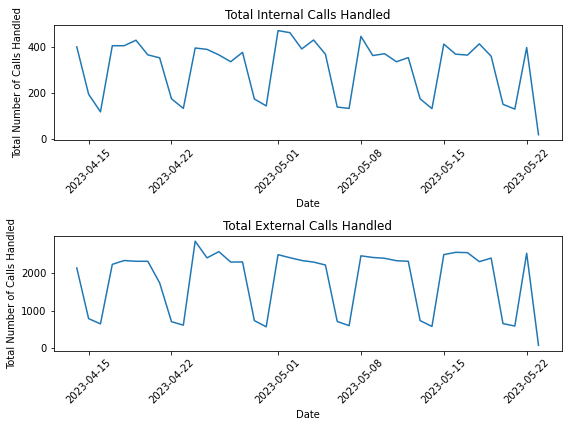

In [54]:
# Plotting internal and external call volumes
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Plotting the first subplot
axes[0].plot(filtered_data['date'], filtered_data['total_internal_calls'])  # Replace 'column_name1' with the actual first column you want to plot
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Number of Calls Handled')
axes[0].set_title('Total Internal Calls Handled')

# Formatting the x-axis ticks as "mm/dd/yy" format
# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

# Adjusting the x-axis tick labels
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

# Plotting the second subplot
axes[1].plot(filtered_data['date'], filtered_data['total_external_calls'])  # Replace 'column_name2' with the actual second column you want to plot
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Number of Calls Handled')
axes[1].set_title('Total External Calls Handled')

# Formatting the x-axis ticks as "mm/dd/yy" format
# axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

# Adjusting the x-axis tick labels
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plots
plt.show()

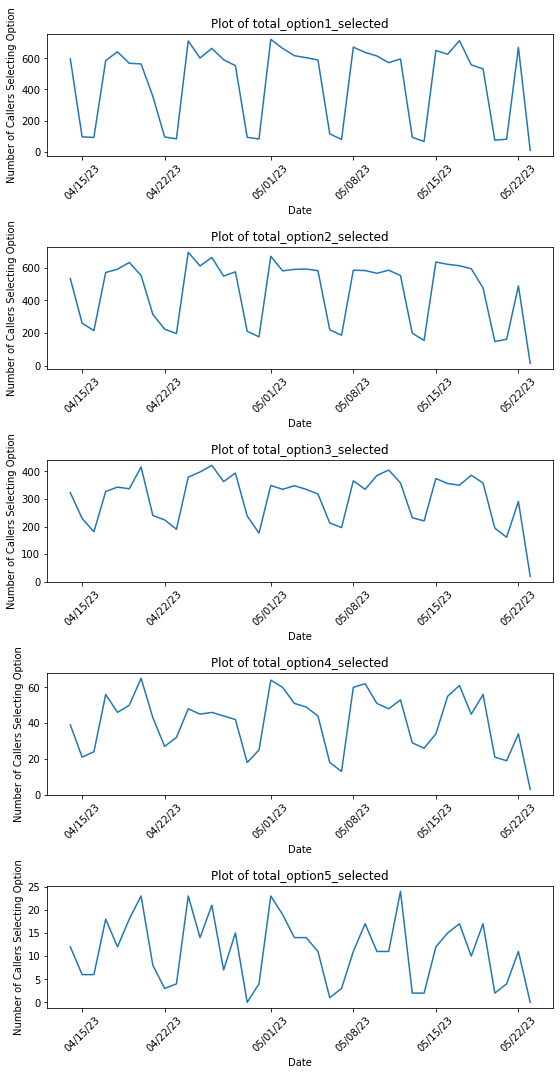

In [59]:
# Create subplots with 5 graphs
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15))

# Plot each graph
for i, ax in enumerate(axes):
    column_name = f'total_option{i+1}_selected'
    ax.plot(filtered_data['date'], filtered_data[column_name])
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Callers Selecting Option')
    ax.set_title(f'Plot of {column_name}')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adjust the spacing between subplots
plt.tight_layout(pad=1.5)

# Display the subplots
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

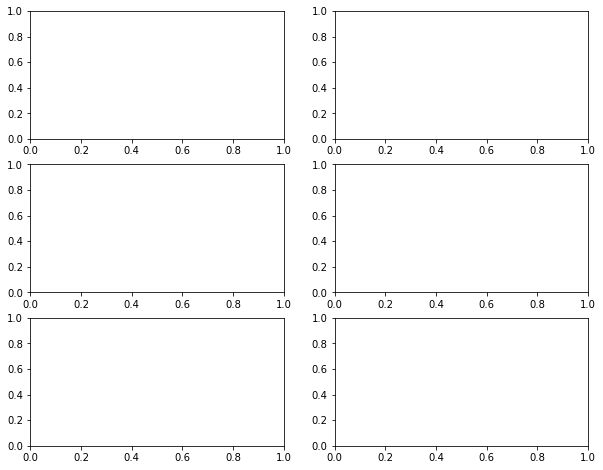

In [56]:
# Subplots for the number of times an option is selected
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Plotting the Call Option 1 subplot
axes[0].plot(filtered_data['date'], filtered_data['total_option1_selected'])  # Replace 'column_name1' with the actual first column you want to plot
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Number of Callers Selecting 1')
axes[0].set_title('Callers Selecting Option 1')

plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)

# Plotting the Call Option 2 subplot
axes[1].plot(filtered_data['date'], filtered_data['total_option2_selected'])  # Replace 'column_name2' with the actual second column you want to plot
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Number of Callers Selecting 2')
axes[1].set_title('Callers Selecting Option 2')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

# Plotting the Call Option 3 subplot
axes[2].plot(filtered_data['date'], filtered_data['total_option3_selected'])  # Replace 'column_name2' with the actual second column you want to plot
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Total Number of Callers Selecting 3')
axes[2].set_title('Callers Selecting Option 3')

plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45)

# Plotting the Call Option 4 subplot
axes[3].plot(filtered_data['date'], filtered_data['total_option4_selected'])  # Replace 'column_name2' with the actual second column you want to plot
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Total Number of Callers Selecting 4')
axes[3].set_title('Callers Selecting Option 4')

plt.setp(axes[3].xaxis.get_majorticklabels(), rotation=45)

# Plotting the Call Option 5 subplot
axes[4].plot(filtered_data['date'], filtered_data['total_option5_selected'])  # Replace 'column_name2' with the actual second column you want to plot
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Total Number of Callers Selecting 5')
axes[4].set_title('Callers Selecting Option 5')

plt.setp(axes[4].xaxis.get_majorticklabels(), rotation=45)

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plots
plt.show()